<a href="https://colab.research.google.com/github/BibekUpadhyaya/IPL_MiddleOvers/blob/main/Cricket4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.Import Library and read .csv file

In [30]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
df_d=pd.read_csv("/content/drive/MyDrive/IPL_ball_by_ball_updated.csv")

In [33]:
df_d.head(20)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.4,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
6,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.5,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.6,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,4.1,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,AB Agarkar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,4.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Agarkar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##2.Data Preprocessing

In [34]:
#1)Will create a data frame by grouping Batsman
#2)Will filter data only for last 4 years
#3)For terminologieslike Srtike Rate(SR) refer to my file Cricket1.ipynb

In [35]:
def balls_per_dismissals(balls,dismissals):
    if dismissals > 0:
      return balls/dismissals
    else:
        return balls/1

def balls_per_boundary(balls,boundaries):
    if boundaries > 0:
       return balls/boundaries
    else:
        return balls/1

def average(runs,dismissals):
    if dismissals > 0:
       return runs/dismissals
    else:
        return runs/1

def dot_percentage(dots,balls):
    if balls > 0:
       return (dots/balls)*100
    else:
       return dots/1  

def battingstatistics(df_d):

    df_d['isdot'] = df_d['runs_off_bat'].apply(lambda x:1 if x==0 else 0)
    df_d['isone'] = df_d['runs_off_bat'].apply(lambda x:1 if x==1 else 0)
    df_d['istwo'] = df_d['runs_off_bat'].apply(lambda x:1 if x==2 else 0)
    df_d['isthree'] = df_d['runs_off_bat'].apply(lambda x:1 if x==3 else 0)
    df_d['isfour'] = df_d['runs_off_bat'].apply(lambda x:1 if x==4 else 0)
    df_d['issix'] = df_d['runs_off_bat'].apply(lambda x:1 if x==6 else 0)

    #creating a DataFrame with groupby by batsman 
    df1=pd.DataFrame(df_d[(df_d.innings <=2) & (df_d.season>=2018)].groupby(['striker'])['isdot','isone','istwo','isthree','isfour','issix'].sum().reset_index().rename(columns = {'isdot':'dots','isone':'ones','istwo':'twos','isthree':'threes','isfour':'fours','issix':'sixes'}))
  

    innings=pd.DataFrame(df_d[(df_d.innings <=2) & (df_d.season>=2018)].groupby(['striker'])['match_id'].apply(lambda x:len(np.unique(x)))).reset_index().rename(columns={'match_id':'innings'})
    runs=pd.DataFrame(df_d[(df_d.innings <=2) & (df_d.season>=2018)].groupby(['striker'])['runs_off_bat'].sum()).reset_index().rename(columns={'runs_off_bat':'runs'})
    balls=pd.DataFrame(df_d[(df_d.innings <=2) & (df_d.season>=2018)].groupby(['striker'])['match_id'].count()).reset_index().rename(columns={'match_id':'balls'}) 
    dismissals=pd.DataFrame(df_d[(df_d.innings <=2) & (df_d.season>=2018)].groupby(['striker'])['player_dismissed'].count()).reset_index().rename(columns={'player_dismissed':'dismissals'})

    df_d=pd.merge(innings,runs,on='striker').merge(balls,on='striker').merge(dismissals,on='striker').merge(df1,on='striker')
    
    #Strike Rate
    df_d['SR']=df_d.apply(lambda x: 100*(x['runs']/x['balls']),axis=1)
    #Runs_per_innings
    df_d['RPI']=df_d.apply(lambda x: x['runs']/x['innings'],axis=1)
    #balls_per_dismissals
    df_d['BPD']=df_d.apply(lambda x:balls_per_dismissals(x['balls'],x['dismissals']),axis=1)
    #balls_per_boundary
    df_d['BPB']=df_d.apply(lambda x:balls_per_boundary(x['balls'],x['fours'] + x['sixes']),axis=1)
    #average
    df_d['average']=df_d.apply(lambda x:average(x['runs'],x['dismissals']),axis=1)
    #dot%
    df_d['dot_percentage']=df_d.apply(lambda x:dot_percentage(x['dots'],x['balls']),axis=1) 

    return(df_d)

In [36]:
df1=battingstatistics(df_d)
df1.head(100)

,striker,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,average,dot_percentage
0,A Dananjaya,1,4,5,0,2,2,1,0,0,0,80.000000,4.000000,5.000000,5.000000,4.000000,40.000000
1,A Mishra,5,22,28,2,14,10,2,0,2,0,78.571429,4.400000,14.000000,14.000000,11.000000,50.000000
2,A Nortje,3,7,6,1,3,1,0,2,0,0,116.666667,2.333333,6.000000,6.000000,7.000000,50.000000
3,AB de Villiers,52,1689,1081,40,336,438,81,5,126,95,156.244218,32.480769,27.025000,4.891403,42.225000,31.082331
4,AD Hales,6,148,119,6,48,44,8,0,13,6,124.369748,24.666667,19.833333,6.263158,24.666667,40.336134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,JR Philippe,5,78,80,4,38,28,4,0,9,1,97.500000,15.600000,20.000000,8.000000,19.500000,47.500000
96,K Gowtham,19,186,113,13,42,32,12,2,13,12,164.601770,9.789474,8.692308,4.520000,14.307692,37.168142
97,K Rabada,13,83,73,7,31,25,8,0,6,3,113.698630,6.384615,10.428571,8.111111,11.857143,42.465753
98,K Yadav,1,0,4,0,4,0,0,0,0,0,0.000000,0.000000,4.000000,4.000000,0.000000,100.000000


In [37]:
##Powerplay=1-6 overs
##MiddleOvers=7-16 overs
##DeathOvers=17-20 overs

In [38]:
#We do not have over column
#Need to create it from ball column 
#Will convert ball into string and divide into over and balls

In [39]:
df_d['ball']=df_d['ball'].astype(str)

In [40]:
new=df_d['ball'].str.split('.',n=1,expand=True)

In [41]:
#making separate colimn for balls and overs

In [42]:
df_d['overs']=new[0]

In [43]:
df_d['overs']

0          6
1          2
2          3
3          3
4          3
          ..
208036    14
208037    14
208038    14
208039    12
208040    19
Name: overs, Length: 208041, dtype: object

In [44]:
df_d['ball']

0          6.8
1          2.7
2          3.1
3          3.2
4          3.3
          ... 
208036    14.4
208037    14.5
208038    14.6
208039    12.6
208040    19.6
Name: ball, Length: 208041, dtype: object

In [45]:
df_d['balls']=new[1]

In [46]:
# Dropping old ball columns
df_d.drop(columns =["ball"], inplace = True)

In [47]:
df_d['balls']=df_d['balls'].astype(int)

In [48]:
df_d['overs']=df_d['overs'].astype(int)

In [49]:
df_d.head()

,match_id,season,start_date,venue,innings,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isdot,isone,istwo,isthree,isfour,issix,overs,balls
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,6,8
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,2,7
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,3,1
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,3,2
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,3,3


In [50]:
def phase(overs):
    if overs <= 5:
        return 'Powerplay'
    elif overs <= 14:
        return 'Middle'
    else:
        return 'Death'

In [51]:
df_d['phase']=df_d['overs'].apply(lambda x:phase(x))

In [52]:
df_d.head(1)

,match_id,season,start_date,venue,innings,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isdot,isone,istwo,isthree,isfour,issix,overs,balls,phase
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,6,8,Middle


In [53]:
def gamephases(df_d,current_phase):
    df_d=df_d[df_d.phase==current_phase]
    df_d.reset_index(inplace=True,drop=True)

In [54]:
def gamephases(df_d,current_phase):
    df_d=df_d[df_d.phase==current_phase]
    df_d.reset_index(inplace=True,drop=True)

    def balls_per_dismissals(balls,dismissals):
        if dismissals > 0:
          return balls/dismissals
        else:
            return balls/1

    def balls_per_boundary(balls,boundaries):
        if boundaries > 0:
          return balls/boundaries
        else:
            return balls/1

    def average(runs,dismissals):
        if dismissals > 0:
          return runs/dismissals
        else:
            return runs/1

    def dot_percentage(dots,balls):
        if balls > 0:
          return (dots/balls)*100
        else:
          return dots/1  


    df_d['isdot'] = df_d['runs_off_bat'].apply(lambda x:1 if x==0 else 0)
    df_d['isone'] = df_d['runs_off_bat'].apply(lambda x:1 if x==1 else 0)
    df_d['istwo'] = df_d['runs_off_bat'].apply(lambda x:1 if x==2 else 0)
    df_d['isthree'] = df_d['runs_off_bat'].apply(lambda x:1 if x==3 else 0)
    df_d['isfour'] = df_d['runs_off_bat'].apply(lambda x:1 if x==4 else 0)
    df_d['issix'] = df_d['runs_off_bat'].apply(lambda x:1 if x==6 else 0)

    #creating a DataFrame with groupby by batsman 
    df1=pd.DataFrame(df_d[(df_d.innings <=2) & (df_d.season>=2018)].groupby(['striker'])['isdot','isone','istwo','isthree','isfour','issix'].sum().reset_index().rename(columns = {'isdot':'dots','isone':'ones','istwo':'twos','isthree':'threes','isfour':'fours','issix':'sixes'}))
  

    innings=pd.DataFrame(df_d[(df_d.innings <=2) & (df_d.season>=2018)].groupby(['striker'])['match_id'].apply(lambda x:len(np.unique(x)))).reset_index().rename(columns={'match_id':'innings'})
    runs=pd.DataFrame(df_d[(df_d.innings <=2) & (df_d.season>=2018)].groupby(['striker'])['runs_off_bat'].sum()).reset_index().rename(columns={'runs_off_bat':'runs'})
    balls=pd.DataFrame(df_d[(df_d.innings <=2) & (df_d.season>=2018)].groupby(['striker'])['match_id'].count()).reset_index().rename(columns={'match_id':'balls'}) 
    dismissals=pd.DataFrame(df_d[(df_d.innings <=2) & (df_d.season>=2018)].groupby(['striker'])['player_dismissed'].count()).reset_index().rename(columns={'player_dismissed':'dismissals'})

    df_d=pd.merge(innings,runs,on='striker').merge(balls,on='striker').merge(dismissals,on='striker').merge(df1,on='striker')
    
    #Strike Rate
    df_d['SR']=df_d.apply(lambda x: 100*(x['runs']/x['balls']),axis=1)
    #Runs_per_innings
    df_d['RPI']=df_d.apply(lambda x: x['runs']/x['innings'],axis=1)
    #balls_per_dismissals
    df_d['BPD']=df_d.apply(lambda x:balls_per_dismissals(x['balls'],x['dismissals']),axis=1)
    #balls_per_boundary
    df_d['BPB']=df_d.apply(lambda x:balls_per_boundary(x['balls'],x['fours'] + x['sixes']),axis=1)
    #average
    df_d['average']=df_d.apply(lambda x:average(x['runs'],x['dismissals']),axis=1)
    #dot%
    df_d['dot_percentage']=df_d.apply(lambda x:dot_percentage(x['dots'],x['balls']),axis=1) 

    return(df_d)

In [55]:
df_PP=gamephases(df_d,'Powerplay')
df_MO=gamephases(df_d,'Middle')
df_DO=gamephases(df_d,'Death')

In [56]:
df_MO

,striker,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,average,dot_percentage
0,A Mishra,1,2,6,0,4,2,0,0,0,0,33.333333,2.000000,6.000000,6.000000,2.000000,66.666667
1,AB de Villiers,42,811,612,21,189,290,40,3,54,36,132.516340,19.309524,29.142857,6.800000,38.619048,30.882353
2,AD Hales,3,34,37,3,12,20,3,0,2,0,91.891892,11.333333,12.333333,18.500000,11.333333,32.432432
3,AD Nath,5,43,47,4,20,21,2,0,3,1,91.489362,8.600000,11.750000,11.750000,10.750000,42.553191
4,AD Russell,32,465,325,12,150,101,6,0,28,40,143.076923,14.531250,27.083333,4.779412,38.750000,46.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Washington Sundar,10,85,88,4,34,41,5,0,7,1,96.590909,8.500000,22.000000,11.000000,21.250000,38.636364
168,YBK Jaiswal,6,95,64,6,20,31,0,0,7,6,148.437500,15.833333,10.666667,4.923077,15.833333,31.250000
169,YK Pathan,9,85,95,2,43,39,4,0,8,1,89.473684,9.444444,47.500000,10.555556,42.500000,45.263158
170,YS Chahal,2,4,21,1,19,1,0,1,0,0,19.047619,2.000000,21.000000,21.000000,4.000000,90.476190


In [57]:
df_MO.to_csv('MiddleOvers_4yrs.csv')

##Scatterplot Visualization


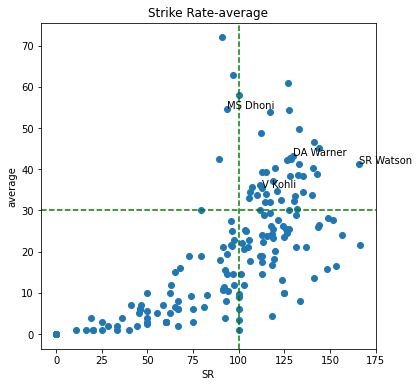

In [61]:
plt.figure(figsize = (6, 6))
plt.scatter(df_MO['SR'], df_MO['average'] )
plt.xlabel('SR')
plt.ylabel('average')
plt.title('Strike Rate-average')

plt.axhline(y = 30, ls = '--', c = 'g')
plt.axvline(x = 100, ls = '--', c = 'g')

annotations=list(df_MO['striker'])
selected_players = [ 'MS Dhoni', 'DA Warner','SR Watson','V Kohli']

for i, label in enumerate(annotations):
    if label in selected_players:
        plt.annotate(label, (df_MO['SR'][i], df_MO['average'][i]))
    
    
plt.show()